

In **Part 4**, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

## **2. Load the data set**

In [ ]:
# ! wget https://github.com/jatindangi1206/drug-discovery/blob/main/acetylcholinesterase/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv 

In [23]:
# 2. Load the dataset
df = pd.read_csv('/Users/jatindangi/Desktop/ICGEB/PROJECT/acetylcholinesterase/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
print("Initial shape:", df.shape)

Initial shape: (6642, 882)


In [24]:
# 3. Check NaNs in pIC50
print("NaN in pIC50 before cleaning:", df['pIC50'].isna().sum())

NaN in pIC50 before cleaning: 1


In [22]:
# 3. Check missing values in target
print("NaN in pIC50:", df['pIC50'].isna().sum())

NaN in pIC50: 0


In [25]:
# 4. Drop the one NaN row
df = df.dropna(subset=['pIC50'])
print("NaN in pIC50 after cleaning:", df['pIC50'].isna().sum())
print("Shape after dropping NaN:", df.shape)


NaN in pIC50 after cleaning: 0
Shape after dropping NaN: (6641, 882)


## **3. Input features**
The ***Acetylcholinesterase*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [26]:
X = df.drop('pIC50', axis=1)
Y = df['pIC50']

### **3.2. Output features**

In [27]:
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6637,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6638,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6639,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6640,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
6637    4.337242
6638    4.416688
6639    5.767004
6640    5.000000
6641    5.000000
Name: pIC50, Length: 6641, dtype: float64

### **3.3. Let's examine the data dimension**

In [29]:
print("X shape before selection:", X.shape)
print("Y shape:", Y.shape)

X shape before selection: (6641, 881)
Y shape: (6641,)


In [30]:
X.shape

(6641, 881)

In [31]:
Y.shape

(6641,)

### **3.4. Remove low variance features**

In [32]:
# 6. Feature selection - Remove low variance features
selector = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selector.fit_transform(X)
print("X shape after selection:", X.shape)

X shape after selection: (6641, 144)


In [33]:
X.shape

(6641, 144)

## **4. Data split (80/20 ratio)**

In [34]:
# 7. Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [35]:
print("Train shapes:", X_train.shape, Y_train.shape)
print("Test shapes:", X_test.shape, Y_test.shape)

Train shapes: (5312, 144) (5312,)
Test shapes: (1329, 144) (1329,)


## **5. Building a Regression Model using Random Forest**

In [36]:
#  Build Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Example: XGBoost
model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
print("R²:", r2)


In [37]:
# Predictions & Evaluation
Y_pred = model.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

In [38]:
print("R² score:", r2)
print("RMSE:", rmse)

R² score: 0.382353884340785
RMSE: 1.2181615522061995


In [39]:
# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1][:10]  # Top 10

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

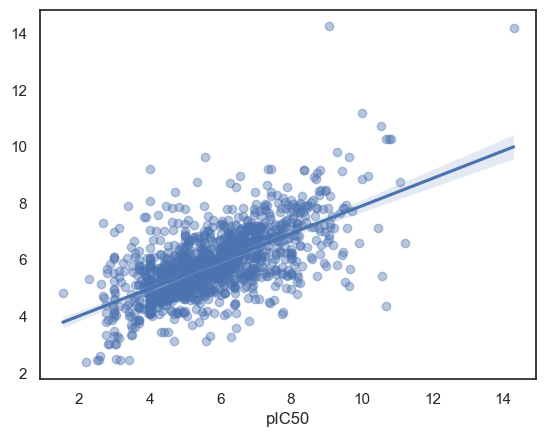

In [43]:
ax = sns.regplot(
    x=Y_test, 
    y=Y_pred, 
    scatter_kws={'alpha': 0.4}
)    

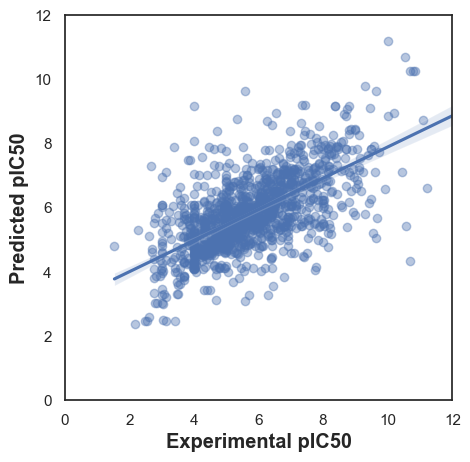

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(
    x=Y_test, 
    y=Y_pred, 
    scatter_kws={'alpha': 0.4}
)
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)

plt.show()


In [48]:
! pip install bokeh


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [50]:
# Install bokeh if not already installed
%pip install bokeh

from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool, ColorBar, LinearColorMapper
from bokeh.io import output_notebook
from bokeh.transform import transform
import numpy as np
import pandas as pd

output_notebook()

# Convert to numpy arrays if they aren't already
y_true = np.array(Y_test)
y_pred = np.array(Y_pred)

# Calculate error
error = np.abs(y_true - y_pred)

# Create dataframe for plotting
df = pd.DataFrame({
    'Experimental': y_true,
    'Predicted': y_pred,
    'Error': error
})

# Create color mapper for error
mapper = LinearColorMapper(palette="Turbo256", low=df["Error"].min(), high=df["Error"].max())

# Create ColumnDataSource
source = ColumnDataSource(df)

# Create figure
p = figure(width=700, height=500,
           title="Experimental vs Predicted pIC50",
           x_axis_label="Experimental pIC50",
           y_axis_label="Predicted pIC50")

# Scatter plot with color based on error
p.circle('Experimental', 'Predicted', 
         source=source,
         size=8, 
         color=transform('Error', mapper),
         line_color=None, 
         fill_alpha=0.6)

# Add hover tool
hover = HoverTool(tooltips=[
    ("Experimental", "@Experimental{0.00}"),
    ("Predicted", "@Predicted{0.00}"),
    ("Error", "@Error{0.00}")
])
p.add_tools(hover)

# Add 1:1 line
p.line([df["Experimental"].min(), df["Experimental"].max()],
       [df["Experimental"].min(), df["Experimental"].max()],
       line_color="black", line_dash="dashed", line_width=2)

# Add color bar
color_bar = ColorBar(color_mapper=mapper, label_standoff=12, location=(0,0))
p.add_layout(color_bar, 'right')

show(p)



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Loading BokehJS ...